# Introduction


In order to find the best neighborhood in Pittsburgh, we determined the quality of each with two submetrics: **Transportation** and **Public Safety**. The primary reason of choosing **transportation** is because transport is necessary for a multitude of daily tasks and activities, especially for commuting to work. Without transportation, commuting to work can be difficult, and work is essential. **Public safety** is chosen because in a neighborhood, exemplified by responsive law enforcement, directly influences residents' sense of security. Effective measures deter criminal activity and foster a safer environment for community members.

For the most part, the difficulty of selecting a metric is from the *availability of data*. In order to analyze data of neighborhoods and determine the winner(s), the dataset must have a field that includes the names of the neighborhoods, otherwise it would be impossible to relate any neighborhood to any data values. It was difficult trying to find a dataset which included reasonable metrics that is fully (or at least, mostly) complete. Some alternatives we settled with were data from 311 calls and data about fire incidents.

### Transportation

This is what the dataset has to offer:

In [32]:
import pandas as pd
t_df = pd.read_csv("transportation.csv", index_col="_id")
t_df.head()

,Neighborhood,Sector #,Population (2010),Miles of Major Roads,Total Street Miles,Street Density (st. mi/area sq. mi),# Sets of Steps,# Step Treads,Res. Permit Parking Area(s),Total Working Pop. (Age 16+) (2010),Commute to Work: Drive Alone (2010),Commute to Work: Carpool/Vanpool (2010),Commute to Work: Public Transportation (2010),Commute to Work: Taxi (2010),Commute to Work: Motorcycle (2010),Commute to Work: Bicycle (2010),Commute to Work: Walk (2010),Commute to Work: Other (2010),Work at Home (2010)
_id,,,,,,,,,,,,,,,,,,,
1,Allegheny Center,3,933,2.232425,4.141467,19.721273,0,0,None,386,0.277202,0.098446,0.168394,0.000000,0.000000,0.0,0.437824,0.000000,0.018135
2,Allegheny West,3,462,1.471627,4.870843,34.544983,0,0,G,151,0.231788,0.205298,0.158940,0.145695,0.000000,0.0,0.258278,0.000000,0.000000
3,Allentown,6,2500,1.648451,12.325689,41.781996,12,474,None,824,0.469660,0.109223,0.379854,0.000000,0.008495,0.0,0.000000,0.014563,0.018204
4,Arlington,7,1869,0.861571,10.734269,22.838871,13,428,None,673,0.739970,0.072808,0.135215,0.000000,0.000000,0.0,0.019316,0.008915,0.023774
5,Arlington Heights,7,244,0.000000,1.086460,8.230760,0,0,None,72,0.111111,0.000000,0.888889,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


After analyzing the dataset, I based my means of measurement from 5 data values: Total Working Population, Drive Alone, Carpool/Vanpool, Public Transportation, and Taxi. 

I subdivided each data value to 2 major categories: 

|Category | Data Values|
|-----------------|-----------------------------------------|
| **Use of cars** |(Drive Alone), (Carpool/Vanpool), (Taxi) |
| **Public Transportation** |(Public Transportation) |



To simplify the transportation dataframe and ultimately measure this submetric accurately, I have chosen on a measure with the following formula:

$M = \frac{C + 1.25T}{2}\times\frac{P}{H}$

where $M$ = measure, $C$ = use of cars, $T$ = use of public transportation, $P$ = total working population, and $H$ = highest total working population in the dataframe.

The larger $M$ is, the "better" the neighborhood will be.

#### Derivation
Public transportation accessibility is given a 1.25 multiplier to highlight its importance, especially for impoverished residents. Hence, the use of cars is given the base multiplier of 1. The neighborhood rankings are adjusted to account for population differences, ensuring a fair comparison across all neighborhoods with multiplying by the ratio of the total working population divided by the highest total working population in the dataset. This approach aims to provide a balanced assessment of neighborhood quality based on transportation and population considerations.

In [66]:
#simplification
twp = "Total Working Pop. (Age 16+) (2010)"
d = "Commute to Work: Drive Alone (2010)"
c = "Commute to Work: Carpool/Vanpool (2010)"
p = "Commute to Work: Public Transportation (2010)"
t = "Commute to Work: Taxi (2010)"

t_df['Use of cars'] = t_df[d] + t_df[c] + t_df[t]
filter3 = t_df[["Neighborhood", twp, d, c, t, 'Use of cars']]

#Find the highest total working population in the dataset
H = t_df[twp].max()
C = t_df['Use of cars']
T = t_df[p]
t_df['Transportation'] = round((C + 1.25*T)/2*(t_df[twp]/H), 2)
ff = t_df[['Neighborhood', twp, 'Use of cars', p, 'Transportation']]
ff = ff.sort_values(by='Transportation', ascending=False)
ff.head()

,Neighborhood,Total Working Pop. (Age 16+) (2010),Use of cars,Commute to Work: Public Transportation (2010),Transportation
_id,,,,,
68,Shadyside,8223,0.521829,0.268637,0.43
77,Squirrel Hill South,7779,0.626944,0.227407,0.43
14,Brookline,7067,0.831753,0.120277,0.42
53,Mount Washington,5247,0.735658,0.165428,0.30
16,Carrick,4783,0.724232,0.195693,0.28


**Rank**
1. Shadyside
2. Squirrel Hill South
3. Brookline
4. Mount Washington
5. Carrick

### Public Safety


This is just a sample of the data that represents major criminal activity within their respective neighborhoods from all the neighborhoods in the Pittsburgh region. As you can see the data compiles the crime statistics into a single average column showing the average criminal activity between every 100 persons in each neighborhood. This data contains reports from drug violations all the way to murder.
 


In [34]:
import pandas as pd
ps_df = pd.read_csv("PublicSafety.csv", index_col = "_id")
ps_df.head()

,Neighborhood,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
_id,,,,,,,,,,,,,,,
1,Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
2,Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
3,Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
4,Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
5,Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7


While all this data tells us a great deal about the issues of each neighborhood, it gives a lot of unnecessary information. So to visualize it all clearly adding a new category that takes the average of all the data makes it easier to comprehend and rank the information so as to find the best neighborhood. 

In [35]:
ps_df['Average Crime per 100 Persons (2010)'] = round((ps_df['Part 1 Crime per 100 Persons (2010)'] + ps_df['Part 2 Crime per 100 Persons (2010)'])/2, 2)
filtered = ps_df[['Neighborhood', 'Population (2010)', 'Part 1 Crime per 100 Persons (2010)', 'Part 2 Crime per 100 Persons (2010)', 'Average Crime per 100 Persons (2010)']]
filtered.head()

,Neighborhood,Population (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),Average Crime per 100 Persons (2010)
_id,,,,,
1,Allegheny Center,933,7.6,15.1,11.35
2,Allegheny West,462,8.2,10.6,9.40
3,Allentown,"2,500",6.4,10.1,8.25
4,Arlington,"1,869",2.7,4.5,3.60
5,Arlington Heights,244,7.8,15.2,11.50


With this data set collected it now becomes possible to rank each of the neighborhoods based on their average scores. The lower the average the more safe a neighborhood is.

In [38]:
import matplotlib.pyplot as plt
ps_df.sort_values(by=['Average Crime per 100 Persons (2010)'], inplace=True)
filter2 = ps_df[['Neighborhood', 'Average Crime per 100 Persons (2010)']]
filter2.head()

,Neighborhood,Average Crime per 100 Persons (2010)
_id,,
32,Fairywood,0.45
55,New Homestead,0.55
76,Squirrel Hill North,1.15
59,Oakwood,1.40
46,Lincoln Place,1.50


With this new data set the neighborhoods can be ranked within the established submetric of public safety with the safest neighborhoods on the bottom. So by simply examining the lowest value within the graph we find our statistically safest neighborhood of Fairywood. In keeping with the other data sets the top 5 safest neighborhoods have been given points based off score:

**Rank**
1. Fairywood 
2. New Homestead 
3. Squirrel Hill North 
4. Oakwood 
5. Lincoln Place

### Natural Environment Conditions
The best neighborhood in this category was decided by adding the percentage of land in a neighborhood that is dedicated to parkspace and the percentage dedicated to greenway. There is no bias placed on the two different data sets and the 'greenspace' metric is represented by a single float value. 

In [68]:
nec_df = pd.read_csv('tough_times.csv', index_col='_id')
nec_df['Park Space (% of land area)'] = nec_df['Park Space (% of land area)'].str.rstrip('%').astype(float)
nec_df['Greenway (% of land area)'] = nec_df['Greenway (% of land area)'].str.rstrip('%').astype(float)

nec_df['greenspace'] = nec_df['Park Space (% of land area)'] + nec_df['Greenway (% of land area)'] 

filter3 = nec_df[["Neighborhood", 'Park Space (% of land area)', 'Greenway (% of land area)', 'greenspace']]

sorted_data = filter3.sort_values(by='greenspace', ascending=False)
sorted_data.head()

,Neighborhood,Park Space (% of land area),Greenway (% of land area),greenspace
_id,,,,
66,Regent Square,51.6,0.0,51.6
40,Highland Park,47.1,0.0,47.1
1,Allegheny Center,41.1,0.0,41.1
77,Squirrel Hill South,40.0,0.0,40.0
25,Duquesne Heights,22.9,16.6,39.5


**Rank**
1. Regent Square
2. Highland Park
3. Allegheny Center
4. Squirrel Hill South
5. Duquesne Heights

## Finalization
We cannot simply compile the measurements from each submetric and determine the ranks from there, as pandas does not allows us to holistically rank the data (take into account all measurements and determine a rank).

In [102]:
a = 'Transportation'
b = 'Average Crime per 100 Persons (2010)'
c = 'Greenspace'
compiled_df = t_df[['Neighborhood', 'Transportation']].copy()
compiled_df['Average Crime per 100 Persons (2010)'] = ps_df[['Average Crime per 100 Persons (2010)']].copy()
compiled_df['Greenspace'] = nec_df['greenspace'].copy()

#Sorting the data
final_df = compiled_df.sort_values(by=[a, b, c], ascending=False)
final_df.head()

,Neighborhood,Transportation,Average Crime per 100 Persons (2010),Greenspace
_id,,,,
68,Shadyside,0.43,3.35,2.9
77,Squirrel Hill South,0.43,1.80,40.0
14,Brookline,0.42,2.40,4.6
53,Mount Washington,0.30,4.90,15.7
16,Carrick,0.28,4.90,3.5


### Solution
To determine the best neighborhoods between both metrics, we will assign a point system to the ranks of each neighborhood between their respective metrics and tally them up to determine the overall "best" Pittsburgh neighborhood. The first place will get 90 points, and the subsequent places will get a value that is one less than the previous. For example, the second place will get 89 points, the third will get 88 points, etc, until the last place will get 1 point.

To do this, we need to assign a **Points** column on every dataframe, and combine all the points into a *new* dataframe.

In [213]:
#Transportation dataframe
t_df = t_df.sort_values(by="Transportation", ascending=False)
t_df['Points'] = 0

value = 90
for index, row in t_df.iterrows():
    t_df.at[index, 'Points'] = value
    value = value - 1

#Public Safety dataframe
ps_df = ps_df.sort_values(by="Average Crime per 100 Persons (2010)", ascending=False)
ps_df['Points'] = 0

value = 90
for index, row in ps_df.iterrows():
    ps_df.at[index, 'Points'] = value
    value = value - 1
    
#Natural Environment Conditions dataframe
nec_df = nec_df.sort_values(by="greenspace", ascending=False)
nec_df['Points'] = 0

value = 90
for index, row in nec_df.iterrows():
    nec_df.at[index, 'Points'] = value
    value = value - 1

In [214]:
#Summing up all points into a new dataframe
final_df = t_df[['Neighborhood']].copy()
final_df['Points'] = t_df['Points'].copy() + ps_df['Points'].copy() + nec_df['Points'].copy()
final_df = final_df.sort_values(by="Points", ascending=False)
final_df.head()

,Neighborhood,Points
_id,,
53,Mount Washington,214
69,Sheraden,207
72,South Side Flats,205
29,East Liberty,199
3,Allentown,199


Let's use data visualisation for clarity.

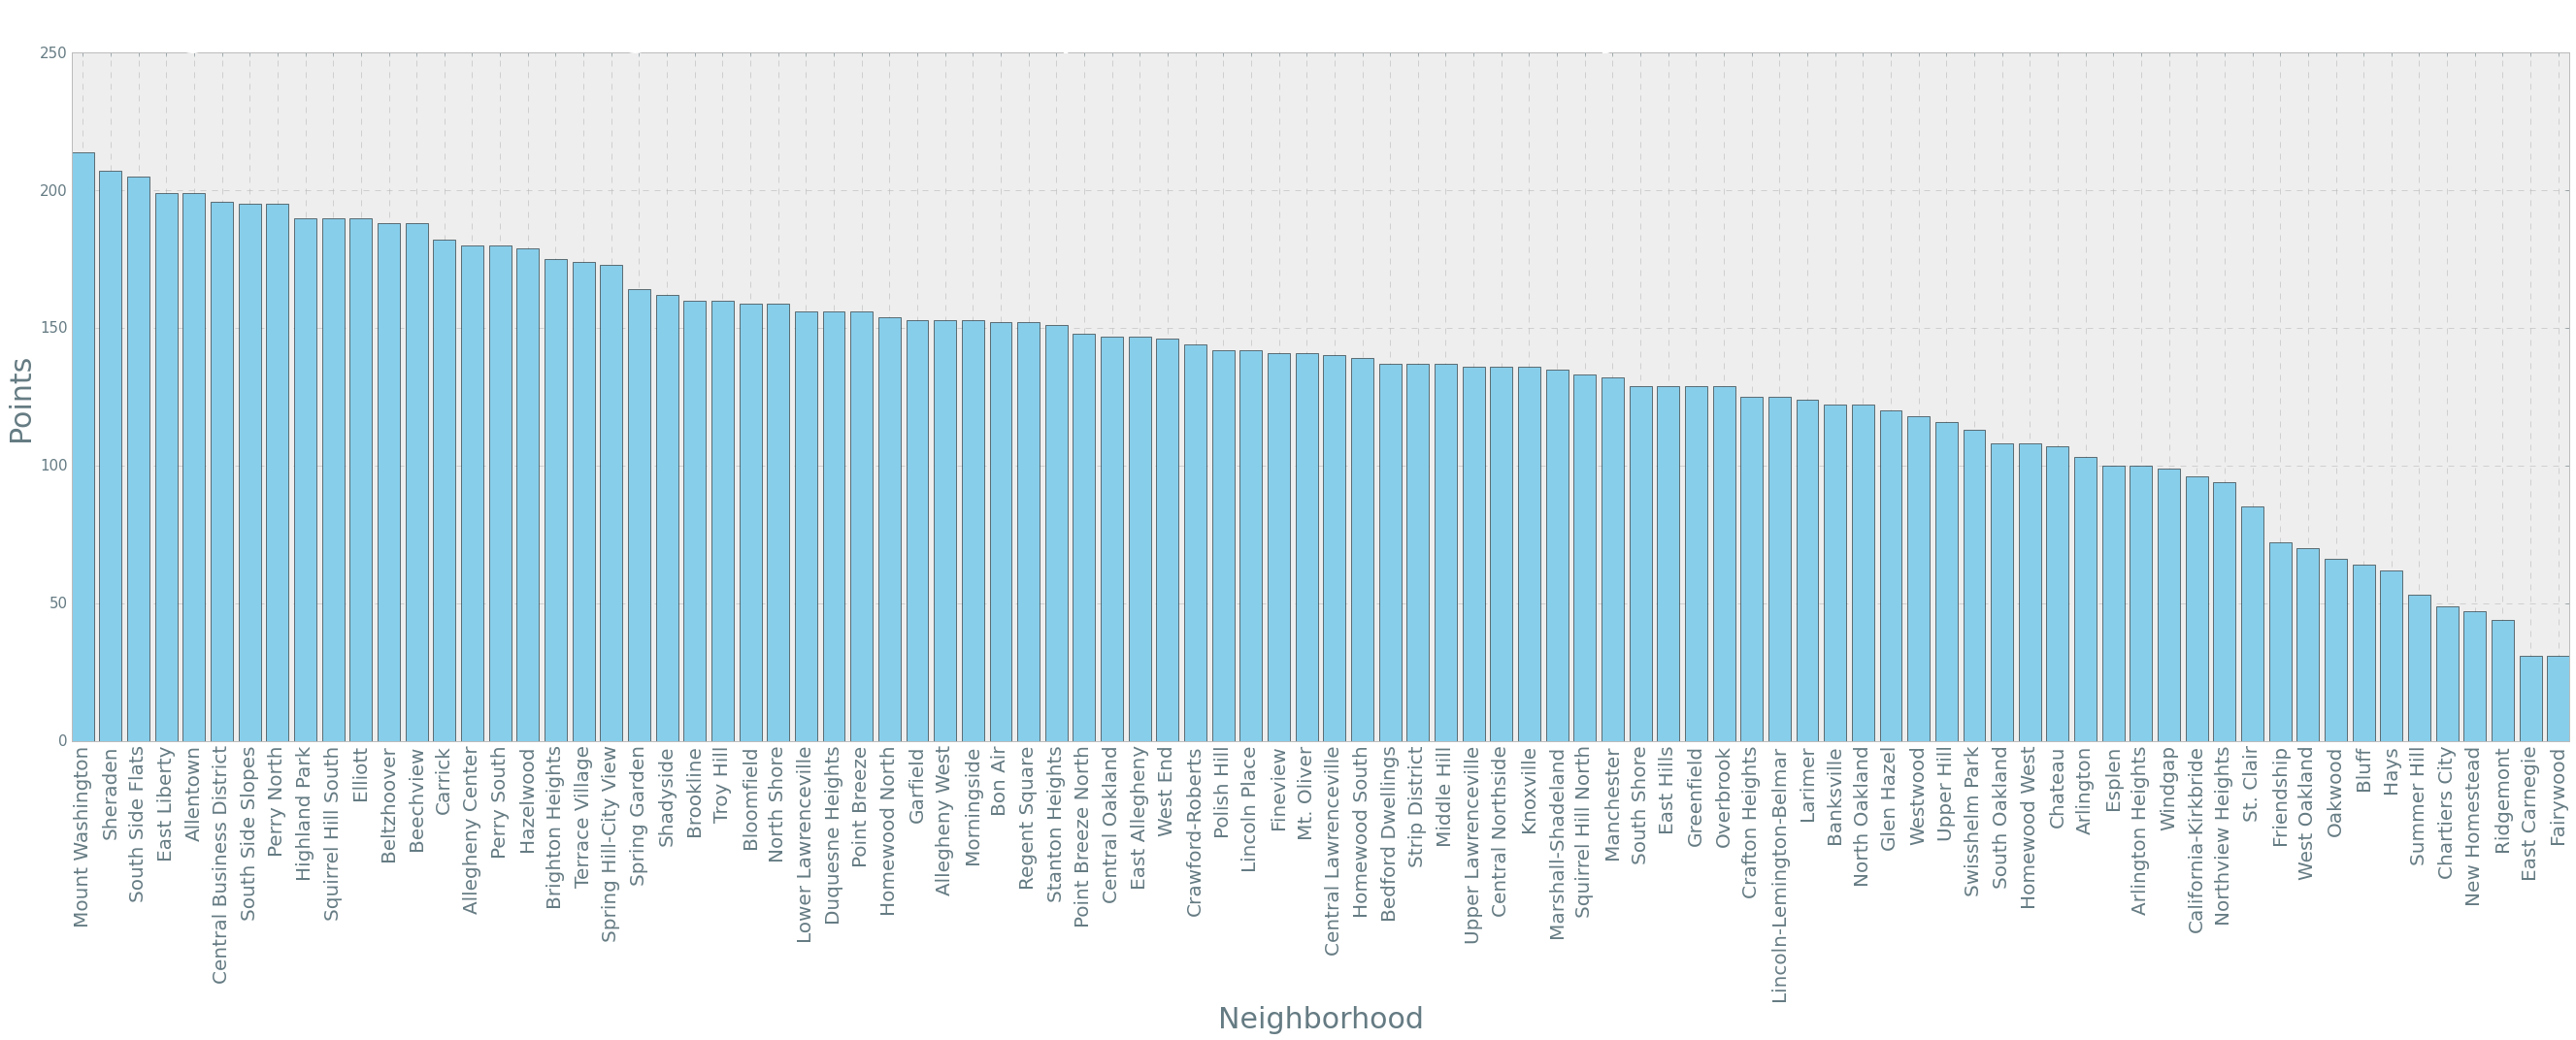

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 15))
plt.bar(final_df['Neighborhood'], final_df['Points'], color='skyblue', edgecolor='black')
plt.xlabel('Neighborhood')
plt.ylabel('Points')
plt.title('Neighborhood Rankings based on Transportation, Public Safety, and Natural Environment Conditions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.rc('xtick', labelsize=20)

plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()

## Conclusion

With everything in mind, **Mount Washington** comes in first, **Sheraden** comes in second, and **South Side Flats** come in third, when pitted against every other Pittsburgh neighborhood using data about **transportation**, **public safety**, and **natural environmental conditions**. Without a doubt, this statistical analysis is very premature and requires much more preliminary preparation, where it is nowhere near as exhaustive as necessary to be considered *accurate* and *professional*. However, when comparing such results with our own individual ones based on one single metric, this is undoubtedly more inclusive and complete. 